<a href="https://colab.research.google.com/github/soumya0422/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices-/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np

In [21]:
from google.colab import files
df = files.upload()

In [22]:
df=pd.read_csv('/content/drive/MyDrive/Cleaned_Data.csv')

In [23]:
df

,Id,Time,heart_rate,Steps_per_minute,Sleep_per_minute
0,2022484408,2016-04-12 07:21:00,101.600000,14.116667,0.0
1,2022484408,2016-04-12 07:22:00,87.888889,14.116667,0.0
2,2022484408,2016-04-12 07:23:00,58.000000,14.116667,0.0
3,2022484408,2016-04-12 07:24:00,58.000000,14.116667,0.0
4,2022484408,2016-04-12 07:25:00,56.777778,14.116667,0.0
...,...,...,...,...,...
334625,8877689391,2016-05-12 14:40:00,56.222222,7.616667,0.0
334626,8877689391,2016-05-12 14:41:00,57.857143,7.616667,0.0
334627,8877689391,2016-05-12 14:42:00,56.000000,7.616667,0.0
334628,8877689391,2016-05-12 14:43:00,57.500000,7.616667,0.0


In [24]:
df_prophet = df.rename(columns={
    "Time": "ds",
    "heart_rate": "y"
})

df_prophet["ds"] = pd.to_datetime(df_prophet["ds"]).dt.tz_localize(None)

In [25]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [26]:
future = model.make_future_dataframe(periods=10, freq="min")
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


                       ds       yhat  yhat_lower  yhat_upper
44186 2016-05-12 16:26:00  76.732912   57.286986   95.856343
44187 2016-05-12 16:27:00  76.763621   56.639896   96.246110
44188 2016-05-12 16:28:00  76.794540   56.322692   95.597050
44189 2016-05-12 16:29:00  76.825661   57.349658   97.284167
44190 2016-05-12 16:30:00  76.856979   57.519548   96.827383


In [27]:
future = model.make_future_dataframe(periods=10, freq="min")

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-04-12 00:00:00,73.223588,48.058999,85.215212,73.223588,73.223588,-5.935639,-5.935639,-5.935639,-5.800055,-5.800055,-5.800055,-0.135584,-0.135584,-0.135584,0.0,0.0,0.0,67.287949
1,2016-04-12 00:01:00,73.225246,47.107446,87.642398,73.225246,73.225246,-5.957765,-5.957765,-5.957765,-5.820870,-5.820870,-5.820870,-0.136895,-0.136895,-0.136895,0.0,0.0,0.0,67.267481
2,2016-04-12 00:02:00,73.226903,48.358230,87.056626,73.226903,73.226903,-5.979973,-5.979973,-5.979973,-5.841766,-5.841766,-5.841766,-0.138207,-0.138207,-0.138207,0.0,0.0,0.0,67.246930
3,2016-04-12 00:03:00,73.228561,46.952029,86.828481,73.228561,73.228561,-6.002270,-6.002270,-6.002270,-5.862749,-5.862749,-5.862749,-0.139522,-0.139522,-0.139522,0.0,0.0,0.0,67.226290
4,2016-04-12 00:04:00,73.230218,48.039010,87.110651,73.230218,73.230218,-6.024662,-6.024662,-6.024662,-5.883824,-5.883824,-5.883824,-0.140838,-0.140838,-0.140838,0.0,0.0,0.0,67.205556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44186,2016-05-12 16:26:00,71.527482,57.286986,95.856343,71.527482,71.527482,5.205431,5.205431,5.205431,5.714567,5.714567,5.714567,-0.509136,-0.509136,-0.509136,0.0,0.0,0.0,76.732912
44187,2016-05-12 16:27:00,71.527380,56.639896,96.246110,71.527380,71.527380,5.236242,5.236242,5.236242,5.744924,5.744924,5.744924,-0.508682,-0.508682,-0.508682,0.0,0.0,0.0,76.763621
44188,2016-05-12 16:28:00,71.527278,56.322692,95.597050,71.527278,71.527278,5.267261,5.267261,5.267261,5.775490,5.775490,5.775490,-0.508229,-0.508229,-0.508229,0.0,0.0,0.0,76.794540
44189,2016-05-12 16:29:00,71.527176,57.349658,97.284167,71.527176,71.527176,5.298484,5.298484,5.298484,5.806260,5.806260,5.806260,-0.507775,-0.507775,-0.507775,0.0,0.0,0.0,76.825661


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


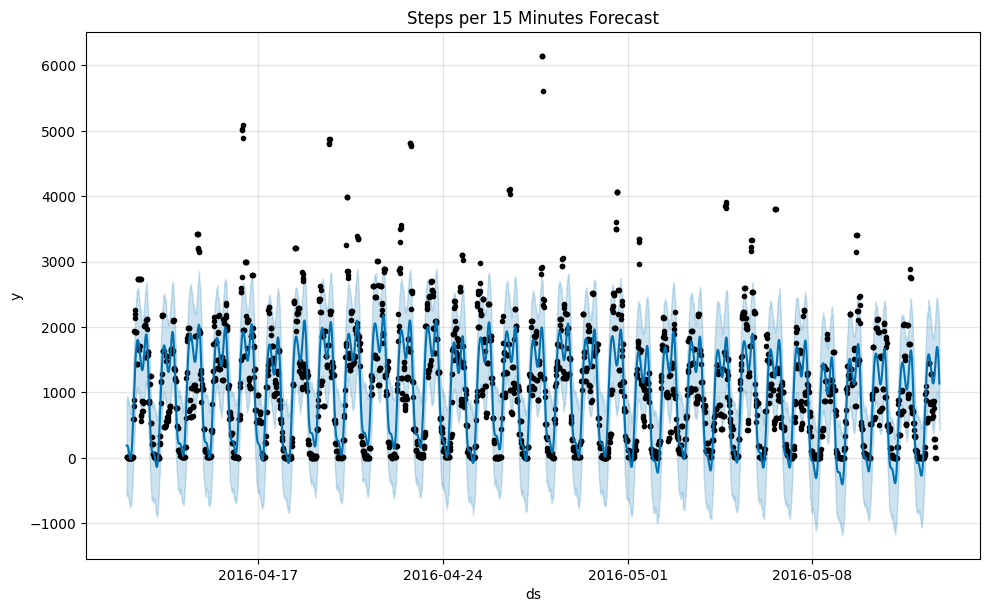

In [29]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data (15-minute aggregation)
df_steps = df[["Time", "Steps_per_minute"]].copy()
df_steps["Time"] = pd.to_datetime(df_steps["Time"])
df_steps = df_steps.rename(columns={"Time": "ds", "Steps_per_minute": "steps"})

df_15min_step = (
    df_steps
    .set_index("ds")
    .resample("15min")
    .sum()
    .reset_index()
)

# Prophet format
df_15min_step["ds"] = pd.to_datetime(df_15min_step["ds"])
df_15min_step.rename(columns={"steps": "y"}, inplace=True)

# Train model
model_steps = Prophet()
model_steps.fit(df_15min_step)

# Predict future (14 × 15min = 3.5 hours)
future_steps = model_steps.make_future_dataframe(periods=14, freq="15min")
forecast_steps = model_steps.predict(future_steps)

# Plot
model_steps.plot(forecast_steps)
plt.title("Steps per 15 Minutes Forecast")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


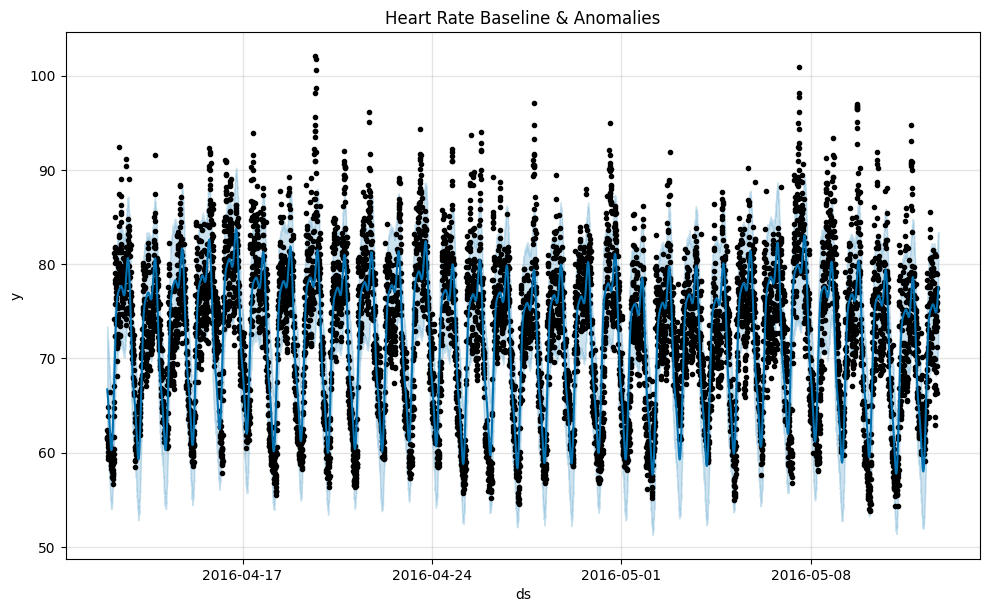

In [30]:
# Resample heart rate
df_hr = (
    df[["Time", "heart_rate"]]
    .copy()
)
df_hr["Time"] = pd.to_datetime(df_hr["Time"]) # Convert 'date' column to datetime objects
df_hr = df_hr.set_index("Time").resample("5min").mean().reset_index()

# Prophet format
df_hr = df_hr.rename(columns={"Time": "ds", "heart_rate": "y"})
df_hr["ds"] = pd.to_datetime(df_hr["ds"])

# Train
model_hr = Prophet(daily_seasonality=True)
model_hr.fit(df_hr)

# Predict
future_hr = model_hr.make_future_dataframe(periods=10, freq="5min")
forecast_hr = model_hr.predict(future_hr)

# Plot
model_hr.plot(forecast_hr)
plt.title("Heart Rate Baseline & Anomalies")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


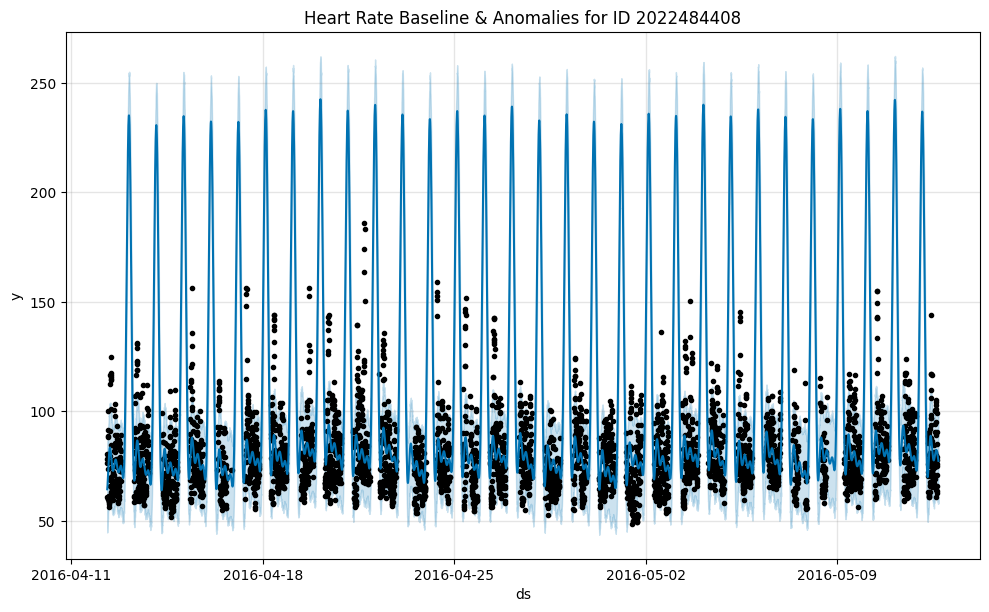

In [31]:
participant_id = 2022484408 # Example: assign a participant ID

# Filter the dataframe for that user
df_user = df[df["Id"] == participant_id][["Time", "heart_rate"]].copy()

# Convert to datetime and resample
df_user["Time"] = pd.to_datetime(df_user["Time"])
df_user = df_user.set_index("Time").resample("5min").mean().reset_index()

# Prepare for Prophet
df_user = df_user.rename(columns={"Time": "ds", "heart_rate": "y"})
df_user["ds"] = pd.to_datetime(df_user["ds"])

# Train Prophet
model_user = Prophet(daily_seasonality=True)
model_user.fit(df_user)

# Predict
future_user = model_user.make_future_dataframe(periods=10, freq="5min")
forecast_user = model_user.predict(future_user)

# Plot
model_user.plot(forecast_user)
plt.title(f"Heart Rate Baseline & Anomalies for ID {participant_id}")
plt.show()

In [32]:
# Aggregate minute-level sleep to daily total
df_sleep_daily = (
    df[["Time", "Sleep_per_minute"]]
    .copy()
)
df_sleep_daily["Time"] = pd.to_datetime(df_sleep_daily["Time"])
df_sleep_daily = df_sleep_daily.set_index("Time").resample("D").sum().reset_index()

# Prepare for Prophet
df_sleep_daily = df_sleep_daily.rename(columns={"Time": "ds", "Sleep_per_minute": "y"})


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


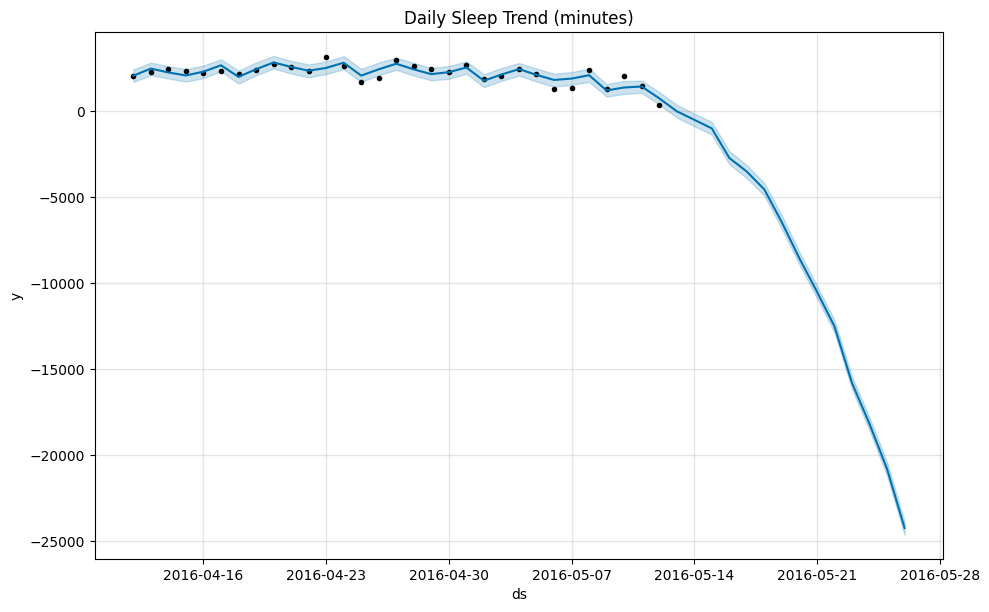

In [33]:
from prophet import Prophet

model_sleep = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model_sleep.fit(df_sleep_daily)

future_sleep = model_sleep.make_future_dataframe(periods=14, freq="D")  # next 14 days
forecast_sleep = model_sleep.predict(future_sleep)

model_sleep.plot(forecast_sleep)
plt.title("Daily Sleep Trend (minutes)")
plt.show()


In [34]:
import pandas as pd

# Merge actual heart rate data with the forecast
anomaly_detection_df = pd.merge(df_hr, forecast_hr[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

# Identify anomalies: actual value outside the forecasted upper or lower bound
anomalies = anomaly_detection_df[
    (anomaly_detection_df['y'] < anomaly_detection_df['yhat_lower']) |
    (anomaly_detection_df['y'] > anomaly_detection_df['yhat_upper'])
]

print("Potential Heart Rate Anomalies (actual value outside forecast range):")
display(anomalies.head())


Potential Heart Rate Anomalies (actual value outside forecast range):


,ds,y,yhat,yhat_lower,yhat_upper
7,2016-04-12 00:35:00,59.680833,65.919769,59.726228,72.169737
8,2016-04-12 00:40:00,59.349167,65.790355,59.671649,72.140569
64,2016-04-12 05:20:00,56.667500,63.787555,57.715928,69.458212
66,2016-04-12 05:30:00,57.859767,64.493037,58.256296,70.711335
69,2016-04-12 05:45:00,58.957500,65.619931,59.198045,71.600365


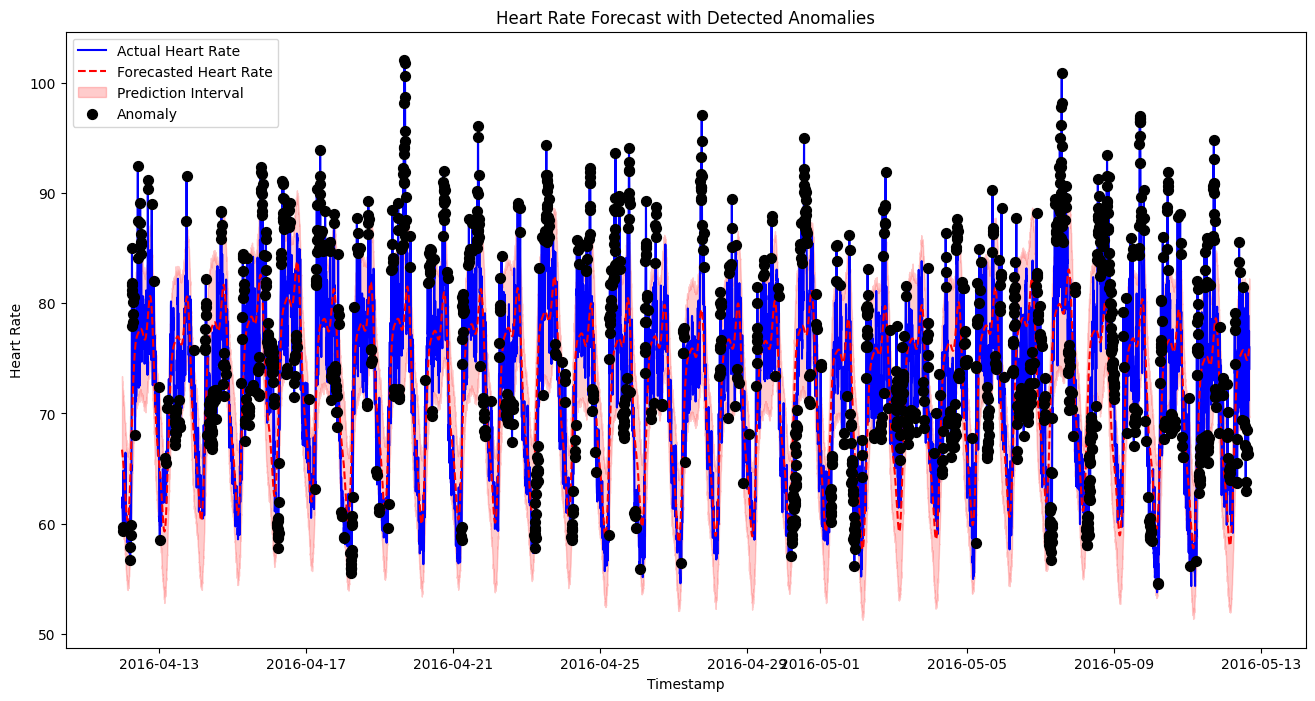

In [35]:

import matplotlib.pyplot as plt

# Plot the forecast with anomalies highlighted
plt.figure(figsize=(16, 8))
plt.plot(anomaly_detection_df['ds'], anomaly_detection_df['y'], label='Actual Heart Rate', color='blue')
plt.plot(anomaly_detection_df['ds'], anomaly_detection_df['yhat'], label='Forecasted Heart Rate', color='red', linestyle='--')
plt.fill_between(anomaly_detection_df['ds'], anomaly_detection_df['yhat_lower'], anomaly_detection_df['yhat_upper'], color='red', alpha=0.2, label='Prediction Interval')

# Highlight anomalies
plt.scatter(anomalies['ds'], anomalies['y'], color='black', marker='o', s=50, zorder=5, label='Anomaly')

plt.title('Heart Rate Forecast with Detected Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()



In [36]:
df.columns

Index(['Id', 'Time', 'heart_rate', 'Steps_per_minute', 'Sleep_per_minute'], dtype='object')

In [ ]:
import pandas as pd

# Using 'df' as your DataFrame
df["Time"] = pd.to_datetime(df["Time"])

# Create day window
df["day"] = df["Time"].dt.date

# Display the head of the modified DataFrame to show the new columns
display(df[['Time', 'day']].head())

,Time,day
0,2016-04-12 07:21:00,2016-04-12
1,2016-04-12 07:22:00,2016-04-12
2,2016-04-12 07:23:00,2016-04-12
3,2016-04-12 07:24:00,2016-04-12
4,2016-04-12 07:25:00,2016-04-12


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
from tsfresh.utilities.dataframe_functions import roll_time_series
import pandas as pd

# Create day window (moved from YWgw0JhqxT4a)
df["Time"] = pd.to_datetime(df["Time"])
df["day"] = df["Time"].dt.date

value_columns = ["heart_rate", "Steps_per_minute", "Sleep_per_minute"]

tsfresh_input = df.melt(
    id_vars=["Id", "Time", "day"],
    value_vars=value_columns,
    var_name="kind",
    value_name="value"
)

tsfresh_input = tsfresh_input.rename(columns={
    "day": "id",
    "Time": "time"
})

tsfresh_input = tsfresh_input[["id", "time", "kind", "value"]]

In [42]:
import numpy as np
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd # Import pandas, as it's used here but not explicitly imported in the cell

# Select only 5 users
selected_users = tsfresh_input["id"].unique()[:5]
tsfresh_input_5 = tsfresh_input[tsfresh_input["id"].isin(selected_users)].copy()

# Optional: downsample to 5-minute intervals to reduce number of rows
tsfresh_input_5['time'] = pd.to_datetime(tsfresh_input_5['time'])
tsfresh_input_5 = tsfresh_input_5.set_index('time').groupby(['id', 'kind']).resample('5T')['value'].mean().reset_index()

# Extract TSFresh features (minimal set for speed)
tsfresh_features = extract_features(
    tsfresh_input_5,
    column_id="id",
    column_sort="time",
    column_kind="kind",
    column_value="value",
    default_fc_parameters=MinimalFCParameters(),  # minimal features
    n_jobs=0  # or -1 if you want parallel processing
)

# Clean extracted features
tsfresh_features.replace([np.inf, -np.inf], np.nan, inplace=True)
tsfresh_features.dropna(axis=1, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tsfresh_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
tsfresh_features["cluster"] = kmeans.fit_predict(X_scaled)

# Final result
tsfresh_features

/tmp/ipython-input-1869424227.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tsfresh_input_5 = tsfresh_input_5.set_index('time').groupby(['id', 'kind']).resample('5T')['value'].mean().reset_index()
Feature Extraction: 100%|██████████| 15/15 [00:00<00:00, 957.39it/s]


,Sleep_per_minute__sum_values,Sleep_per_minute__median,Sleep_per_minute__mean,Sleep_per_minute__length,Sleep_per_minute__standard_deviation,Sleep_per_minute__variance,Sleep_per_minute__root_mean_square,Sleep_per_minute__maximum,Sleep_per_minute__absolute_maximum,Sleep_per_minute__minimum,...,heart_rate__median,heart_rate__mean,heart_rate__length,heart_rate__standard_deviation,heart_rate__variance,heart_rate__root_mean_square,heart_rate__maximum,heart_rate__absolute_maximum,heart_rate__minimum,cluster
2016-04-12,58.567129,0.168596,0.203358,288.0,0.063163,0.003990,0.212941,0.303472,0.303472,0.133256,...,75.377998,72.892424,288.0,8.620241,74.308562,73.400368,92.444144,92.444144,56.667500,1
2016-04-13,62.355842,0.192515,0.216513,288.0,0.056806,0.003227,0.223841,0.318287,0.318287,0.126128,...,71.984291,71.728847,288.0,6.201022,38.452678,71.996389,91.529636,91.529636,58.480556,2
2016-04-14,59.937158,0.178323,0.208115,288.0,0.062812,0.003945,0.217387,0.312371,0.312371,0.116921,...,71.848021,71.833148,288.0,6.353362,40.365212,72.113565,88.349435,88.349435,60.464683,2
2016-04-15,55.332140,0.163599,0.192125,288.0,0.058015,0.003366,0.200694,0.282786,0.282786,0.117917,...,75.140122,73.904524,288.0,8.048985,64.786156,74.341542,92.346984,92.346984,58.572177,1
2016-04-16,58.236201,0.180800,0.202209,288.0,0.048474,0.002350,0.207938,0.308333,0.308333,0.127160,...,76.041949,75.665166,288.0,7.668989,58.813392,76.052815,91.052762,91.052762,57.825501,0


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

n_samples = X_scaled.shape[0]
for k in range(2, min(n_samples, 7)): # Ensure k <= n_samples - 1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.224
K=3, Silhouette Score=0.231
K=4, Silhouette Score=0.094


In [44]:
print(tsfresh_features.groupby("cluster").mean())

         Sleep_per_minute__sum_values  Sleep_per_minute__median  \
cluster                                                           
0                           58.236201                  0.180800   
1                           56.949635                  0.166097   
2                           61.146500                  0.185419   

         Sleep_per_minute__mean  Sleep_per_minute__length  \
cluster                                                     
0                      0.202209                     288.0   
1                      0.197742                     288.0   
2                      0.212314                     288.0   

         Sleep_per_minute__standard_deviation  Sleep_per_minute__variance  \
cluster                                                                     
0                                    0.048474                    0.002350   
1                                    0.060589                    0.003678   
2                                    0.059809     

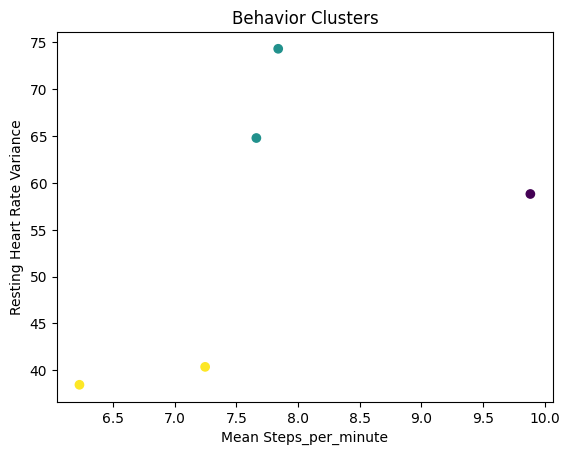

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    tsfresh_features["Steps_per_minute__mean"],
    tsfresh_features["heart_rate__variance"],
    c=tsfresh_features["cluster"]
)
plt.xlabel("Mean Steps_per_minute")
plt.ylabel("Resting Heart Rate Variance")
plt.title("Behavior Clusters")
plt.show()